Statistics:
Total image files: 10550
Total label files: 10550
Matching pairs: 10550
Images without labels: 0
Labels without images: 0
Displaying label array 'x' with shape (512, 512)
Displaying label array 'x' with shape (512, 512)
Displaying label array 'x' with shape (512, 512)
Displaying label array 'x' with shape (512, 512)
Displaying label array 'x' with shape (512, 512)


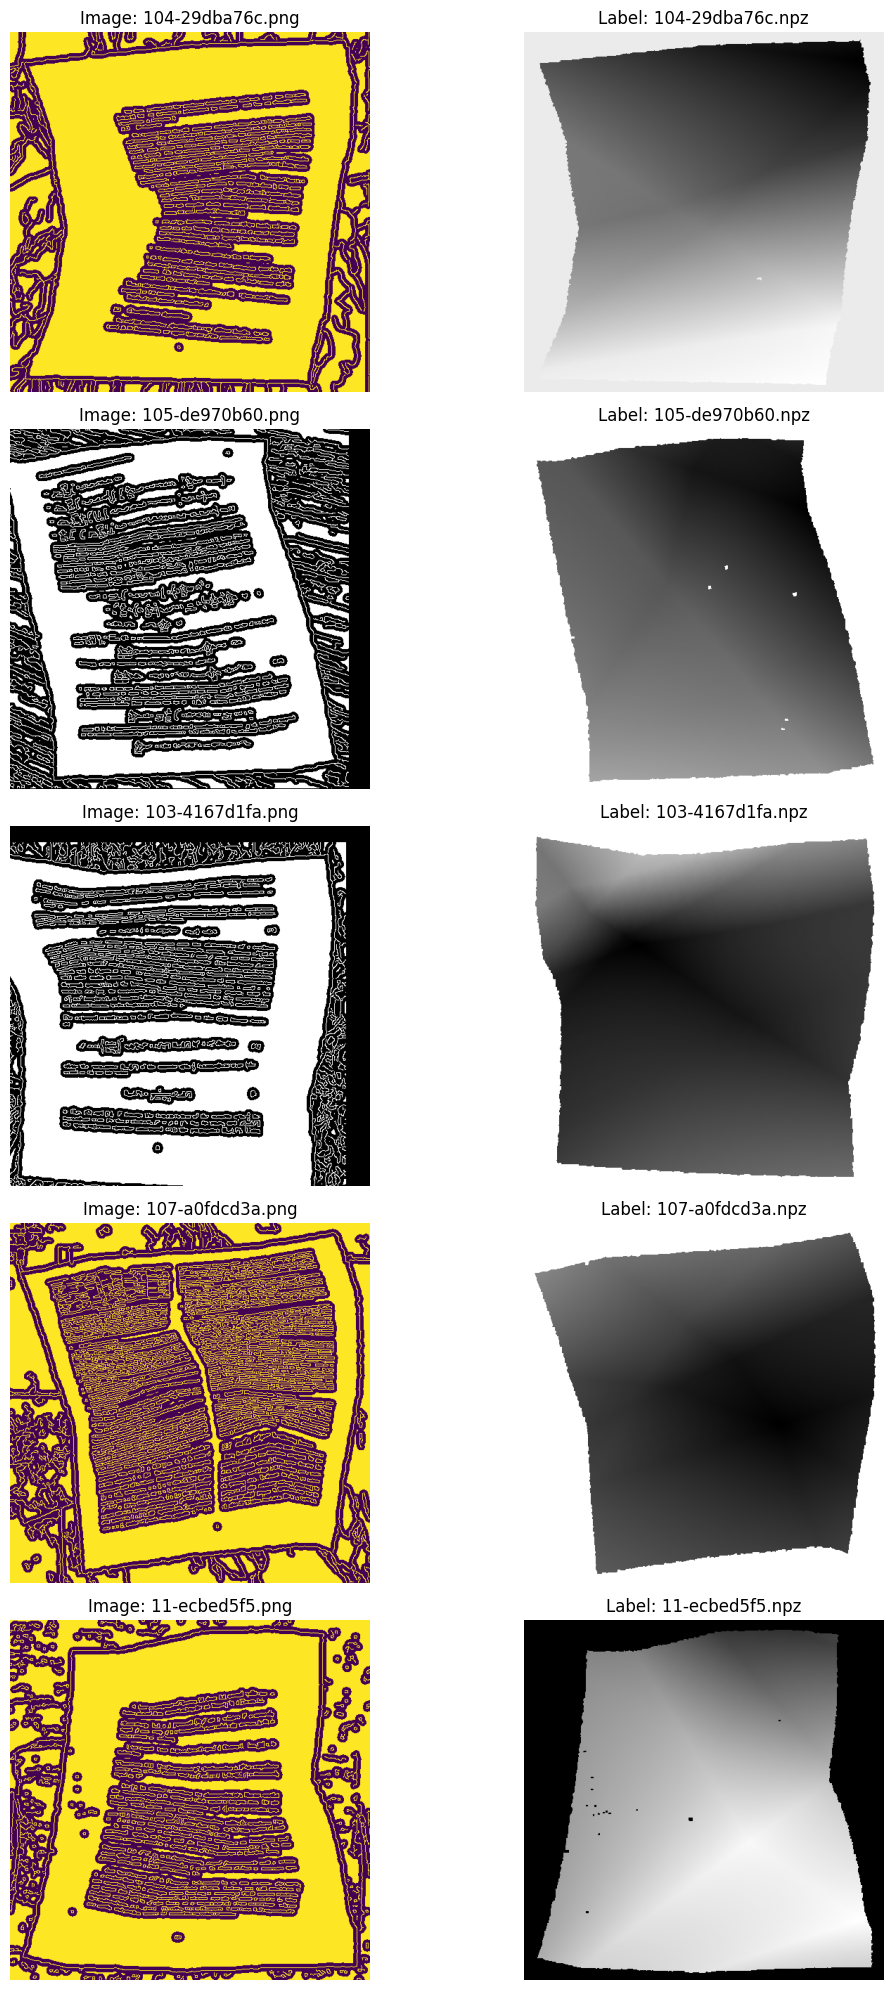


To view more pairs, run the show_pair(index) function with index between 0 and 10549


In [13]:
import os
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Paths to your directories
images_dir = r"/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/train/augmented-new/images"
labels_dir = r"/Users/ileene/Library/CloudStorage/OneDrive-UniversitasCiputra/smt 8/TA/code/docunet-sroie-merged/DocUNet_dataset/preprocessed/train/augmented-new/labels"

# Get all files in both directories
image_files = glob.glob(os.path.join(images_dir, "*.png"))
label_files = glob.glob(os.path.join(labels_dir, "*.npz"))

# Extract base filenames without extensions
image_basenames = {Path(f).stem: f for f in image_files}
label_basenames = {Path(f).stem: f for f in label_files}

# Find matching pairs
matching_pairs = []
for base_name in image_basenames:
    if base_name in label_basenames:
        matching_pairs.append((image_basenames[base_name], label_basenames[base_name]))

# Print statistics
print(f"Statistics:")
print(f"Total image files: {len(image_files)}")
print(f"Total label files: {len(label_files)}")
print(f"Matching pairs: {len(matching_pairs)}")
print(f"Images without labels: {len(image_files) - len(matching_pairs)}")
print(f"Labels without images: {len(label_files) - len(matching_pairs)}")

# Display 5 sample pairs (image and label visualization side by side)
sample_count = min(5, len(matching_pairs))
fig, axes = plt.subplots(sample_count, 2, figsize=(12, 4*sample_count))

for i in range(sample_count):
    img_path = matching_pairs[i][0]
    lbl_path = matching_pairs[i][1]
    
    # Set titles for each pair
    if sample_count == 1:
        axes[0].set_title(f"Image: {os.path.basename(img_path)}")
        axes[1].set_title(f"Label: {os.path.basename(lbl_path)}")
    else:
        axes[i, 0].set_title(f"Image: {os.path.basename(img_path)}")
        axes[i, 1].set_title(f"Label: {os.path.basename(lbl_path)}")
    
    # Load and display image
    img = Image.open(img_path)
    if sample_count == 1:
        axes[0].imshow(img)
        axes[0].axis('off')
    else:
        axes[i, 0].imshow(img)
        axes[i, 0].axis('off')
    
    # Load and display label
    try:
        lbl_data = np.load(lbl_path, allow_pickle=True)
        # Display the label data as an image
        if hasattr(lbl_data, 'files'):
            # It's a .npz archive with multiple arrays, display the first array
            key = lbl_data.files[0]
            label_array = lbl_data[key]
            print(f"Displaying label array '{key}' with shape {label_array.shape}")
        else:
            # It's a single array
            label_array = lbl_data
            print(f"Displaying label array with shape {label_array.shape}")
        
        # Display the label as a grayscale image
        if sample_count == 1:
            axes[1].imshow(label_array, cmap='gray')
            axes[1].axis('off')
        else:
            axes[i, 1].imshow(label_array, cmap='gray')
            axes[i, 1].axis('off')
    except Exception as e:
        print(f"Could not display label file {os.path.basename(lbl_path)}: {str(e)}")
        if sample_count == 1:
            axes[1].text(0.5, 0.5, f"Error loading label: {str(e)}", 
                         ha='center', va='center', transform=axes[1].transAxes)
            axes[1].axis('off')
        else:
            axes[i, 1].text(0.5, 0.5, f"Error loading label: {str(e)}", 
                            ha='center', va='center', transform=axes[i, 1].transAxes)
            axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

# Optional: Provide a function to explore more pairs
def show_pair(index):
    """Display a specific pair by index"""
    if index < 0 or index >= len(matching_pairs):
        print(f"Index out of range. Must be between 0 and {len(matching_pairs)-1}")
        return
    
    img_path, lbl_path = matching_pairs[index]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Display image
    img = Image.open(img_path)
    ax1.imshow(img)
    ax1.set_title(f"Image: {os.path.basename(img_path)}")
    ax1.axis('off')
    
    # Display label
    try:
        lbl_data = np.load(lbl_path, allow_pickle=True)
        if hasattr(lbl_data, 'files'):
            key = lbl_data.files[0]
            label_array = lbl_data[key]
        else:
            label_array = lbl_data
        
        ax2.imshow(label_array, cmap='gray')
        ax2.set_title(f"Label: {os.path.basename(lbl_path)}")
        ax2.axis('off')
    except Exception as e:
        ax2.text(0.5, 0.5, f"Error loading label: {str(e)}", 
                 ha='center', va='center', transform=ax2.transAxes)
        ax2.axis('off')
        
    plt.tight_layout()
    plt.show()

print("\nTo view more pairs, run the show_pair(index) function with index between 0 and", len(matching_pairs)-1)